In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)

couldnt import gadget!


ModuleNotFoundError: No module named 'Param'

In [2]:
def getFunctionY(x, y, sigma):
    return 1/(2*np.pi*sigma**2)*np.exp(-(x**2+y**2)/(2*sigma**2))
def getFunction(x, y, sigma):
    return np.array([x,y]), getFunctionY(x, y, sigma)
def getFTFunction(nu, mu, sigma):
    ks = np.sqrt(nu**2+mu**2).flatten()
    args = np.argsort(ks)
    ks = ks[args]
    y = np.array(1/(2*np.pi)*np.exp(-(nu**2+mu**2)*sigma**2/(2))).flatten()
    y = y[args]
    return ks, y 

$P(x,y)=\frac{1}{2\pi\sigma^2}\exp\left[-\frac{x^2+y^2}{2\sigma^2}\right] \\
\hat{P}(\nu,\mu)=\frac{1}{2\pi}\exp\left[-\sigma^2\frac{\nu^2+\mu^2}{2}\right]$

In [3]:
functionReal = lambda x,p: getFunction(*x, *p)
functionFourier = lambda x,p: getFTFunction(*x, *p)

In [4]:
def doFFTnD(D=2, n=1000, n_pad=0, delta=1, constants = [5e-10, 26., 0.67], realFT=True):
    import collections
    def checkParas(para, name):
        if not isinstance(para, collections.Iterable):
            para = [para for i in range(D)]
        if np.size(para)<D:
            print(name, para)
            raise Exception('need more information for %sx, %sy, ...' %(name,name))
        return para
    def x1(n ,n_pad, delta):
        return (-(n+n_pad)/2 + 1)*delta
    n = checkParas(n, 'n')
    n_pad = checkParas(n_pad, 'n_pad')
    delta = checkParas(delta, 'delta')
    print('n,n_pad,delta',n,n_pad,delta)
#     x1 = (-(n+n_pad)/2 + 1)*deltax;
    mesh = np.meshgrid(*(np.arange(x1(n[i] ,n_pad[i], delta[i]), x1(n[i] ,n_pad[i], delta[i])+(n[i]+n_pad[i])*delta[i], delta[i]) for i in range(D)))
    MaxX = np.max([x for X in [m.flatten() for m in mesh] for x in X])
#     MaxX = grid[-1]-grid[0]
    spacing = deltax
    print('Max value x direction', MaxX)
    print('Spacing x values', MaxX)
    print(constants)
    grid, samples = functionReal(mesh, constants)
    if not realFT:
        factorGrid = np.meshgrid(*(np.arange(0, n[i]+n_pad[i]) for i in range(D)))
        factor = np.array([np.sqrt(n[i]/(2*np.pi))*delta[i]*np.exp(-2*np.pi*np.complex(0,1)*x1(n[i] ,n_pad[i], delta[i])/(n[i]*delta[i])*np.array(factorGrid[i], dtype=np.complex)) for i in range(D)])
        factor = np.prod(factor ,axis=0)
        transform = np.fft.fftn(samples, norm='ortho') * factor
        ksSep = np.array(np.meshgrid(*(np.fft.fftfreq(n[i]+n_pad[i], d = delta[i])*2*np.pi for i in range(D))) )                                         
        ks = np.sqrt(np.sum(ksSep**2 ,axis=0))
    else:
        factorGrid = np.meshgrid(*(np.arange(0, (n[i]+n_pad[i])/2+1) if i==0 else np.arange(0, n[i]+n_pad[i]) for i in range(D)))
        factor = np.array([np.sqrt(n[i]/(2*np.pi))*delta[i]*np.exp(-2*np.pi*np.complex(0,1)*x1(n[i] ,n_pad[i], delta[i])/(n[i]*delta[i])*np.array(factorGrid[i], dtype=np.complex)) for i in range(D)])
        factor = np.prod(factor ,axis=0)
        transform = np.fft.rfftn(samples, norm='ortho') * factor
        ksSep = np.array(np.meshgrid(*(np.fft.rfftfreq(n[i]+n_pad[i], d = delta[i])*2*np.pi if i==0 else np.fft.fftfreq(n[i]+n_pad[i], d = delta[i])*2*np.pi for i in range(D))) )                                         
        ks = np.sqrt(np.sum(ksSep**2 ,axis=0))
    return ks.flatten(), transform.flatten(), MaxX, spacing, functionFourier(ksSep,constants), constants, mesh

Nloop: 0
n,n_pad,delta [1000, 1000] [0, 0] [0.1, 0.1]


/home/kristian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  after removing the cwd from sys.path.


Max value x direction 50.00000000000142
Spacing x values 50.00000000000142
[14]
ks [ 0.          0.06283185  0.12566371 ... 31.29032591 31.35315764
 31.41598937]
transform [ 1.59041944e-01+0.00000000e+00j  1.08108415e-01+4.80572613e-15j
  3.38033546e-02+3.00459527e-15j ... -6.67949468e-09+3.14660797e-20j
  6.67929693e-09-2.41638456e-20j -6.67923102e-09-1.81982262e-19j]
MaxX 50.00000000000142
spacing 0.1
anaFT (array([ 0.        ,  0.06283185,  0.06283185, ..., 44.38442279,
       44.38442279, 44.42882938]), array([0.15915494, 0.10809276, 0.10809276, ..., 0.        , 0.        ,
       0.        ]))
constants [14]
(501000,)
(501000,)
(2, 501000)


NameError: name 'Fig' is not defined

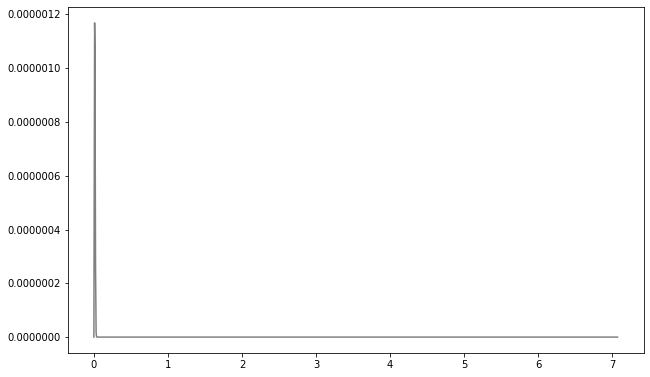

In [5]:
Colors = ['#7ca2df','#2565ca','#0e2850','#bb596d','#9F132F','#4f0917','#ffd27f','#FFA500','#664200']
Markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
#sigma, mu, a, b
n = 1000
N_pad = [0]#[0,n]
skipN = 70
deltax = 100. / n
fig = plt.figure(figsize=np.array([10,6]))
ax = plt.axes([0.15,0.15,0.8,.8])
a, b, c = 5e-10, 26., 1
a, b, c = 5.1542501e-06, 5.0000000e+01, 4.0000000e-01
Constants = [[14]]#, [a, b, 2]]
Nloop = 0
for constants,c in zip(Constants, Colors):
    for marker, n_pad in zip(Markers, N_pad):
        print('Nloop:', Nloop)
        ks, transform, MaxX, spacing, anaFT, constants, grid = doFFTnD(n=n, n_pad=n_pad, delta=deltax, constants = constants, realFT=True)
        print('ks',ks)
        print('transform',transform)
        print('MaxX',MaxX)
        print('spacing',spacing)
        print('anaFT',anaFT)
        print('constants',constants)
        
        print(np.shape(ks))
        print(np.shape(transform))
        print(np.shape(anaFT))
        ax.plot(abs(anaFT[0])/(2*np.pi), abs(anaFT[1])**2*(anaFT[0]/(2*np.pi))**2, c='gray', label='analytical')
        ks, transform, err = Fig.do_Radprof(ks,transform,weight=None,range=[None,None],log=False,NBins=100,typeCalc='average',errbar=None, return_binedges=False, SameNumberPointsPerBin=False)
        ax.scatter(*[x if index == 1 else x/(2*np.pi) for index,x in enumerate(np.array([ks,abs(transform)**2*(ks/(2*np.pi))**2]))], c='red', marker='x', label='num real $\sigma=$%g, n_pad: %i' %(constants[-1], n_pad))
        ks, transform, MaxX, spacing, anaFT, constants, grid = doFFTnD(n=n, n_pad=n_pad, delta=deltax, constants = constants, realFT=False)
        ax.scatter(*[x[::skipN] if index == 1 else x[::skipN]/(2*np.pi) for index,x in enumerate(np.array([ks,abs(transform)**2*(ks/(2*np.pi))**2]))], alpha=0.5, c=c, marker=marker, label='num all $\sigma=$%g, n_pad: %i' %(constants[-1], n_pad))
        Nloop += 1
    Nloop += 1

plt.axvline(x=2*np.pi/spacing/2, label=r'$2\pi/(2\Delta x)$', c='grey', ls='--')#can probe scales 2*dx
# plt.axvline(x=2*np.pi/spacing/8, label=r'$2\pi/(4\Delta x)$', c='grey', ls=':')#can probe scales 2*dx
# plt.axvline(x=0.5, label=r'pad ok', c='grey')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k/2\pi$')
ax.set_ylabel('g(k)')
# ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

# fig.canvas.draw()
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels = ['%s'%(2*np.pi/float(l)) for l in labels if float(l)!=0]
# ax.set_xticklabels(labels)
ax.set_ylim([1e-27,1e-2])
plt.legend(loc='center left', framealpha=.8, fancybox=True, bbox_to_anchor=(1,0.5))

fig.savefig('TestingFourierAnalyticsPressureProfileGXPython.pdf', dpi=450)


fig = plt.figure()
ax1 = plt.axes([0.15,0.15,0.8,.8])
# print(grid[grid>0])
for constants in Constants:
#     print(functionReal(grid,constants))
    print([np.sqrt(np.sum(x**2, axis=0)).flatten() if index==0 else x.flatten() for index,x in enumerate(functionReal(grid,constants))][0])
    print([np.sqrt(np.sum(x**2, axis=0)).flatten() if index==0 else x.flatten() for index,x in enumerate(functionReal(grid,constants))][1])
    ax1.scatter(*(np.sqrt(np.sum(x**2, axis=0)).flatten() if index==0 else x.flatten() for index,x in enumerate(functionReal(grid,constants))) , label='%g' %constants[-1])
ax1.set_ylim([1e-20,1e2])
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.legend(loc='center left', framealpha=.8, fancybox=True, bbox_to_anchor=(1,0.5))

plt.show()